**Importing Required Modules, ML Models and Evaluation metrics**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Uploading Dataset to Google drive**

In [ ]:
# Mount Google Drive (run this in the first code cell)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset path in mounted Drive
dataset_path = "/content/drive/MyDrive/SPAM text message 20170820 - Data.csv"

**Reading Data File**

In [ ]:
# Reading datafile and showing top 10 rows
df = pd.read_csv(dataset_path)
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Data overview**

In [ ]:
# Summary statistics of the DataFrame
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30


In [ ]:
# Shape of pandas dataframe
df.shape

(5572, 2)

In [ ]:
# Display information about the DataFrame
print("\nInformation about the DataFrame:")
print(df.info())


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [ ]:
# Count of each category
print("\nCount of each category:")
print(df['Category'].value_counts())


Count of each category:
Category
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
# Length of each message
df['Message_Length'] = df['Message'].apply(len)
print("\nLength of each message:")
print(df[['Message', 'Message_Length']])


Length of each message:
                                                Message  Message_Length
0     Go until jurong point, crazy.. Available only ...             111
1                         Ok lar... Joking wif u oni...              29
2     Free entry in 2 a wkly comp to win FA Cup fina...             155
3     U dun say so early hor... U c already then say...              49
4     Nah I don't think he goes to usf, he lives aro...              61
...                                                 ...             ...
5567  This is the 2nd time we have tried 2 contact u...             160
5568               Will ü b going to esplanade fr home?              36
5569  Pity, * was in mood for that. So...any other s...              57
5570  The guy did some bitching but I acted like i'd...             125
5571                         Rofl. Its true to its name              26

[5572 rows x 2 columns]


In [ ]:
# Average message length
avg_length = df['Message_Length'].mean()
print("\nAverage message length:", avg_length)


Average message length: 80.36898779612348


In [ ]:
# Maximum message length
max_length = df['Message_Length'].max()
print("Maximum message length:", max_length)

Maximum message length: 910


In [ ]:
# Minimum message length
min_length = df['Message_Length'].min()
print("Minimum message length:", min_length)

Minimum message length: 2


**Data Visualization**

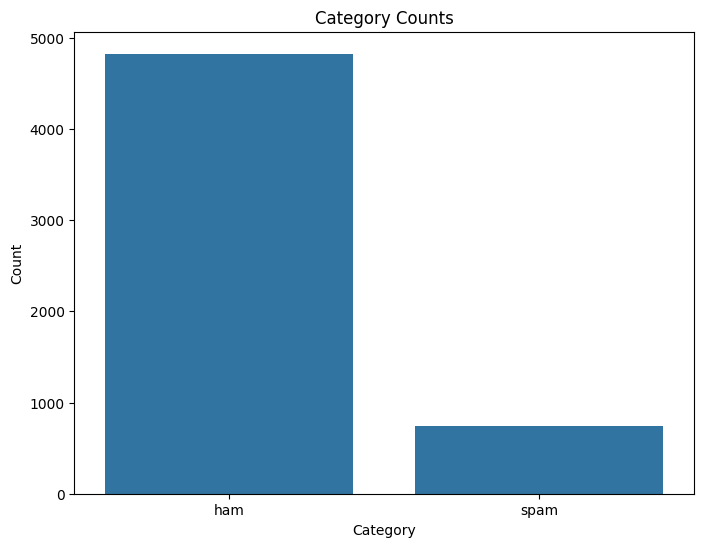

In [ ]:
# Bar chart for category counts
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category')
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

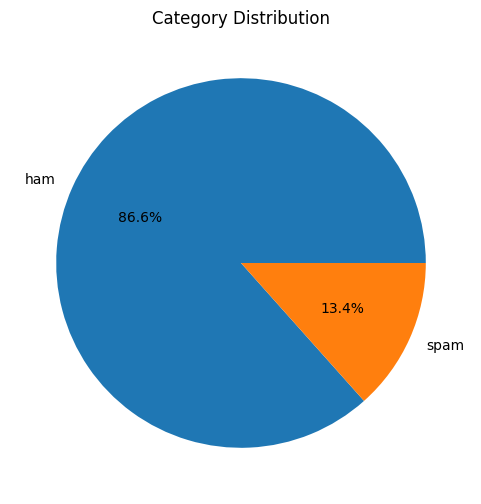

In [ ]:
# Pie chart for category distribution
plt.figure(figsize=(6, 6))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Category Distribution')
plt.ylabel('')
plt.show()

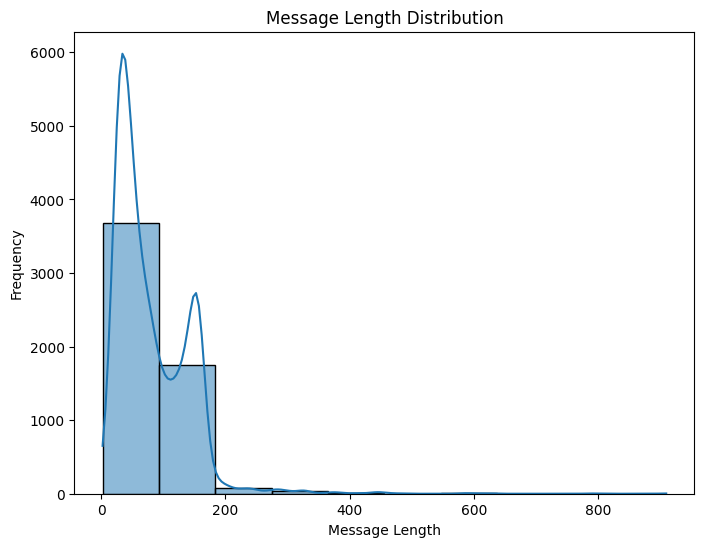

In [ ]:
# Histogram for message length distribution
plt.figure(figsize=(8, 6))
df['Message_Length'] = df['Message'].apply(len)
sns.histplot(df['Message_Length'], bins=10, kde=True)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

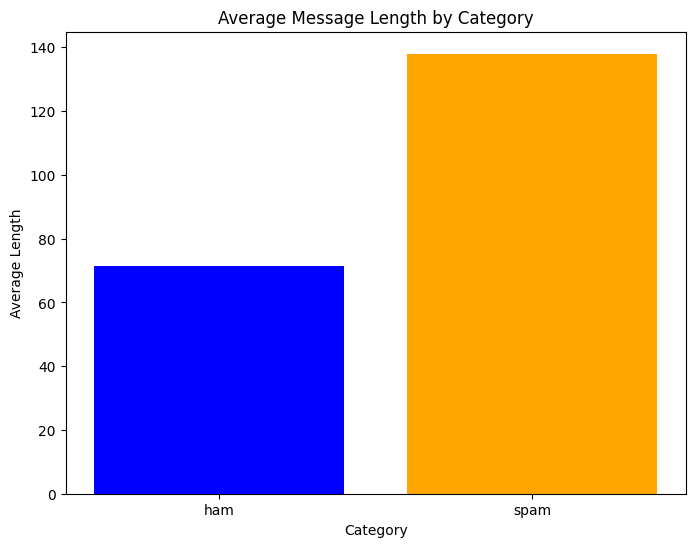

In [ ]:
# Calculate average message length by category
avg_length_by_category = df.groupby('Category')['Message'].apply(lambda x: x.str.len().mean()).reset_index(name='Average_Length')
# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(avg_length_by_category['Category'], avg_length_by_category['Average_Length'], color=['blue', 'orange'])
plt.title('Average Message Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Length')
plt.show()

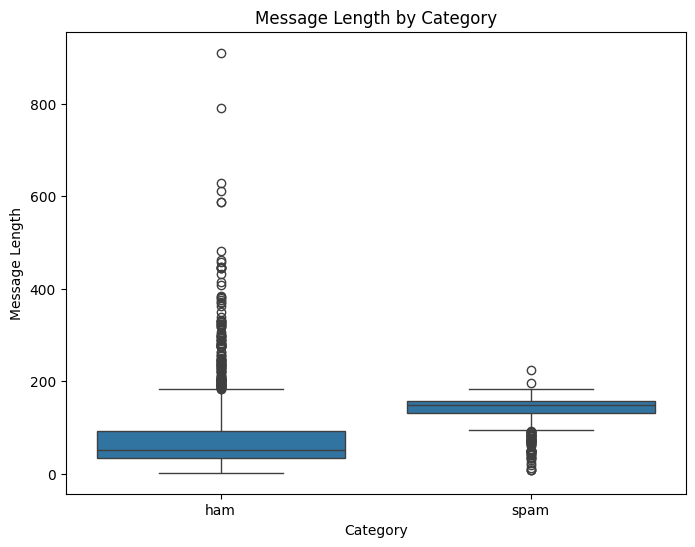

In [ ]:
# Boxplot for message length by category
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Category', y='Message_Length')
plt.title('Message Length by Category')
plt.xlabel('Category')
plt.ylabel('Message Length')
plt.show()

In [ ]:
# Text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize words
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Join words back into sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply text cleaning to the 'review' column
df['Message'] = df['Message'].apply(clean_text)

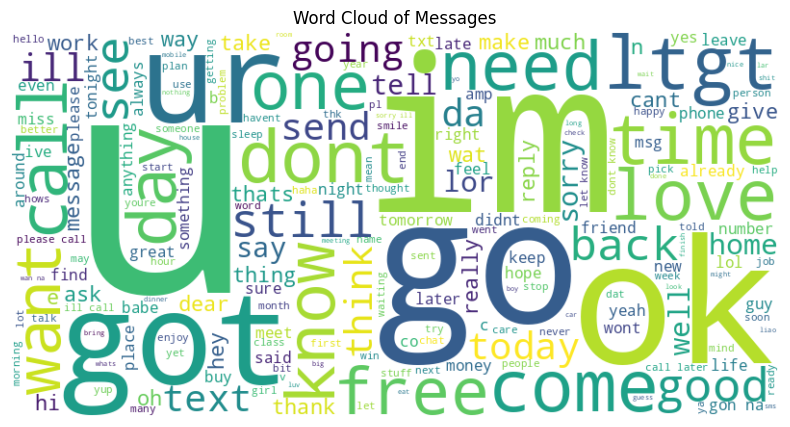

In [ ]:
# Apply text cleaning to the 'review' column
df['Message'] = df['Message'].apply(clean_text)
text = ' '.join(df['Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Messages')
plt.axis('off')
plt.show()

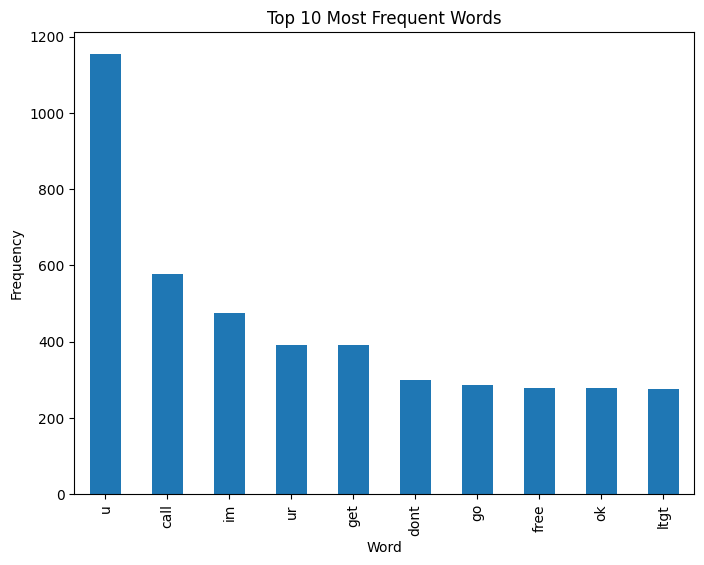

In [ ]:
# Bar chart for top N most frequent words
top_n = 10
word_freq = pd.Series(text.split()).value_counts()[:top_n]
plt.figure(figsize=(8, 6))
word_freq.plot(kind='bar')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

**Data Preparation**

In [ ]:
def update(cat):
    if cat == "spam":
        return 1
    elif cat == "ham":
        return 0
    return cat
df.loc[:, "Category"] = df["Category"].apply(update)
df.head()

,Category,Message,Message_Length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry wkly comp win fa cup final tkts st ...,155
3,0,u dun say early hor u c already say,49
4,0,nah dont think goes usf lives around though,61


In [ ]:
df.drop("Message_Length",axis=1,inplace=True)
df.head()

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


In [ ]:
# Text cleaning function
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove non-alphanumeric characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize words
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Join words back into sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

# Apply text cleaning to the 'review' column
df['Message'] = df['Message'].apply(clean_text)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert labels to integers
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [ ]:

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Message'])
y = df['Category']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Machine Learning**

In [ ]:
accuracy_scores = {}

# Defining models
models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Linear SVM': LinearSVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Multilayer Perceptron': MLPClassifier(),
}

In [ ]:
# Plot confusion matrix as heatmap function
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

**Training and Evaluating Models**

Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.82      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



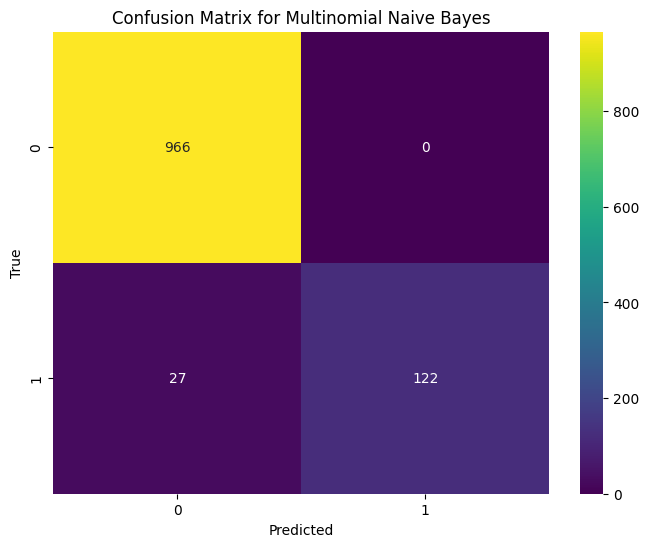

Classification Report for Linear SVM:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



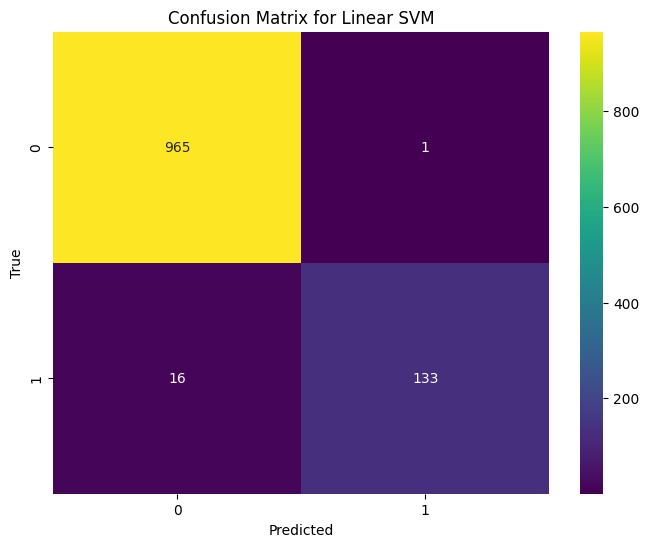

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.97      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115



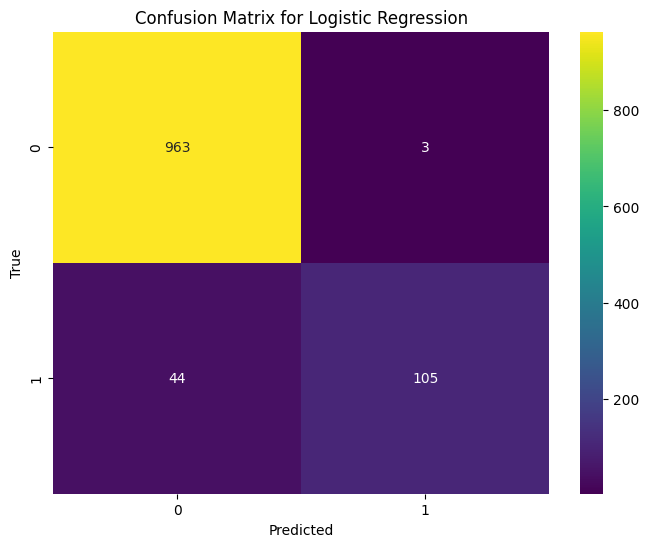

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.88      0.87      0.87       149

    accuracy                           0.97      1115
   macro avg       0.93      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



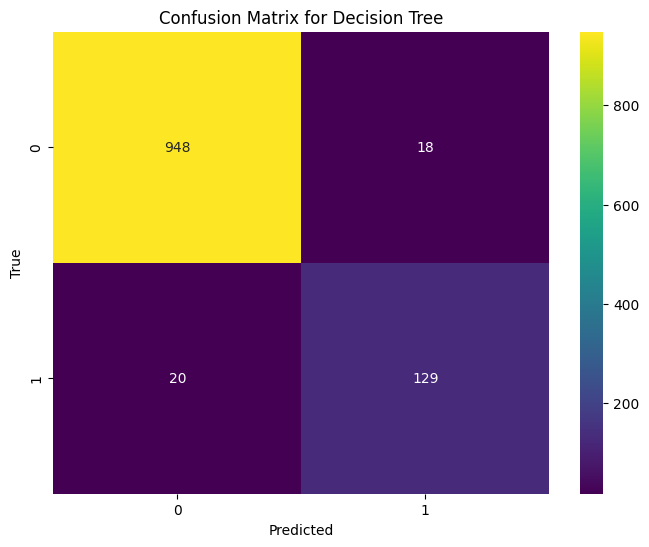

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



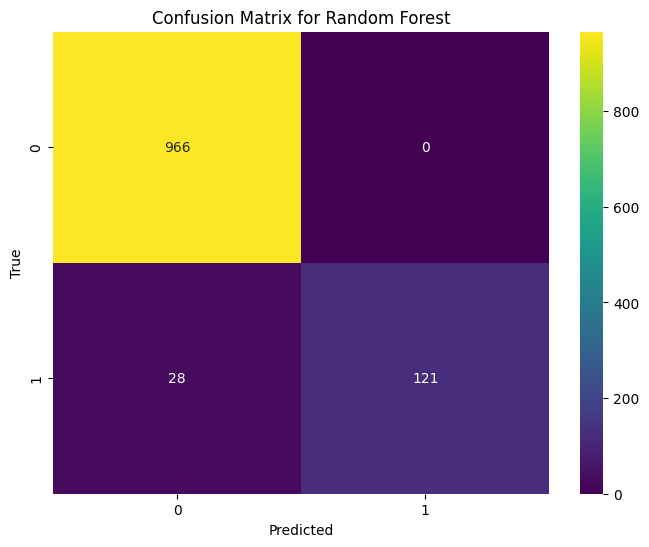

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



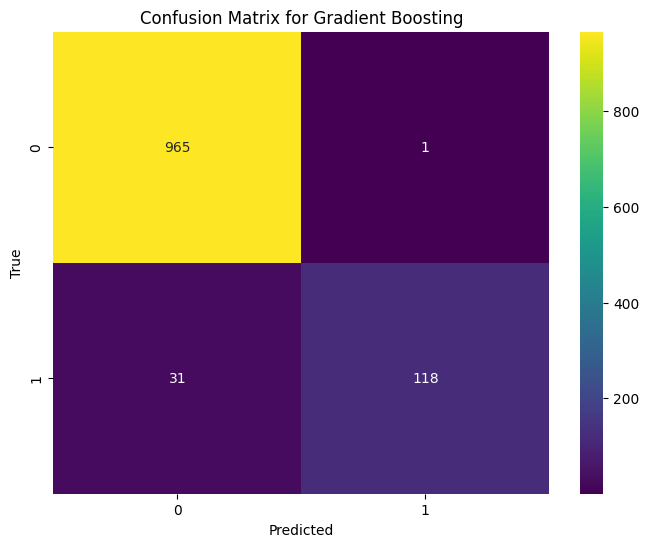

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.96      0.83      0.89       149

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



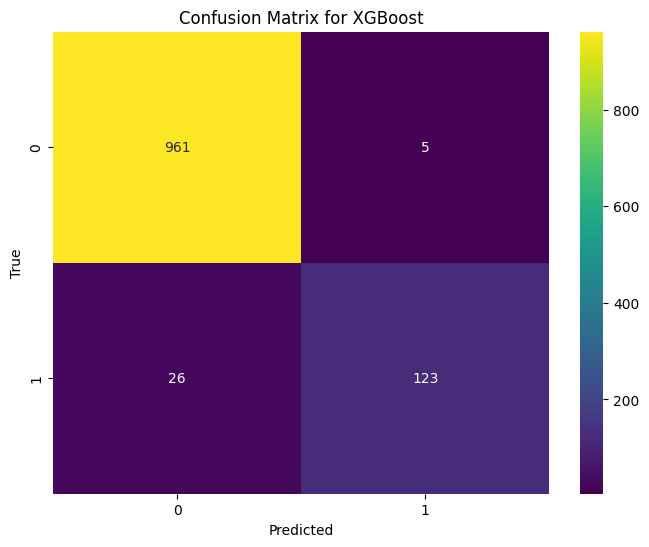

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       966
           1       1.00      0.42      0.59       149

    accuracy                           0.92      1115
   macro avg       0.96      0.71      0.78      1115
weighted avg       0.93      0.92      0.91      1115



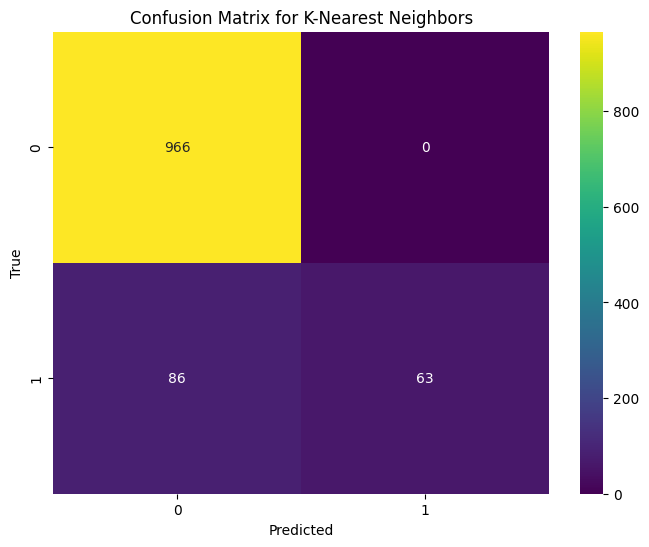

Classification Report for Multilayer Perceptron:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.91      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



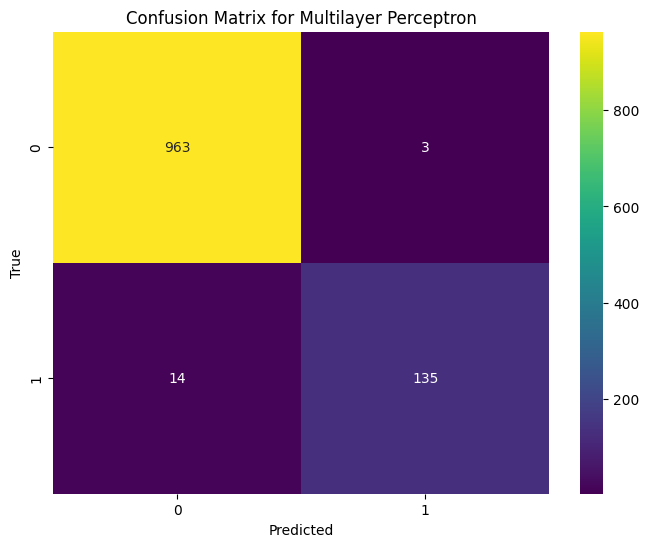

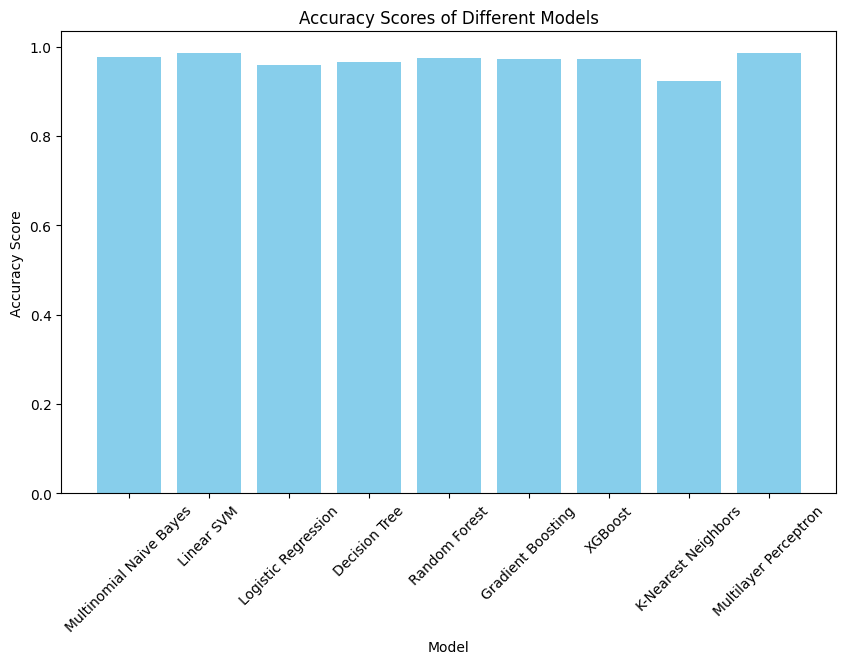

In [ ]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))


    # Plot confusion matrix as heatmap
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix for {model_name}')

# Print accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.xticks(rotation=45)
plt.show()